In [1]:
import pandas as pd
import numpy as np

In [2]:
#df = pd.read_csv('control_group (1).csv')
# Read the CSV file, specifying the separator as ';'
abtest = pd.read_csv('control_group.csv', sep=';')

# Display the first few rows of the DataFrame to verify the data
abtest.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Define a dictionary mapping the old column names to the new column names
new_column_names = {
    'Campaign Name': 'campaign_name',
    'Date': 'date',
    'Spend [USD]': 'spend_usd',
    '# of Impressions': 'impressions',
    'Reach': 'reach',
    '# of Website Clicks': 'website_clicks',
    '# of Searches': 'searches',
    '# of View Content': 'view_content',
    '# of Add to Cart': 'add_to_cart',
    '# of Purchase': 'purchase'
}

# Rename the columns using the dictionary
abtest = abtest.rename(columns=new_column_names)

In [4]:
abtest.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
abtest.nunique()

campaign_name      1
date              30
spend_usd         30
impressions       29
reach             29
website_clicks    29
searches          29
view_content      26
add_to_cart       29
purchase          28
dtype: int64

In [6]:

# Define the list of device types
device_types = ['Desktop', 'Mobile', 'Tablet']

# Generate random device types for each row in the DataFrame
random_device_types = np.random.choice(device_types, size=len(abtest))

# Assign the randomly generated device types to a new column in the DataFrame
abtest['Device Type'] = random_device_types

# Display the DataFrame with the randomly assigned device types
abtest.head()

,campaign_name,date,spend_usd,impressions,reach,website_clicks,searches,view_content,add_to_cart,purchase,Device Type
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Tablet
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Tablet
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Mobile
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Mobile
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile


In [7]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   campaign_name   30 non-null     object 
 1   date            30 non-null     object 
 2   spend_usd       30 non-null     int64  
 3   impressions     29 non-null     float64
 4   reach           29 non-null     float64
 5   website_clicks  29 non-null     float64
 6   searches        29 non-null     float64
 7   view_content    29 non-null     float64
 8   add_to_cart     29 non-null     float64
 9   purchase        29 non-null     float64
 10  Device Type     30 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 2.7+ KB


In [10]:
abtest['date'] = pd.to_datetime(abtest['date'], format='%d.%m.%Y')

In [12]:
abtest['date'].dtype

dtype('<M8[ns]')

In [13]:
# Identify missing/blank values
missing_values = abtest.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
campaign_name     0
date              0
spend_usd         0
impressions       1
reach             1
website_clicks    1
searches          1
view_content      1
add_to_cart       1
purchase          1
Device Type       0
dtype: int64


In [14]:
abtest["impressions"].fillna(value=abtest["impressions"].mean(), inplace=True)

abtest["reach"].fillna(value=abtest["reach"].mean(), inplace=True)


abtest["website_clicks"].fillna(value=abtest["website_clicks"].mean(), inplace=True)

abtest["searches"].fillna(value=abtest["searches"].mean(), inplace=True)

abtest["view_content"].fillna(value=abtest["view_content"].mean(), inplace=True)

abtest["add_to_cart"].fillna(value=abtest["add_to_cart"].mean(), inplace=True)

abtest["purchase"].fillna(value=abtest["purchase"].mean(), inplace=True)

In [15]:
# Identify missing/blank values
missing_values = abtest.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
campaign_name     0
date              0
spend_usd         0
impressions       0
reach             0
website_clicks    0
searches          0
view_content      0
add_to_cart       0
purchase          0
Device Type       0
dtype: int64


In [16]:
import matplotlib.pyplot as plt

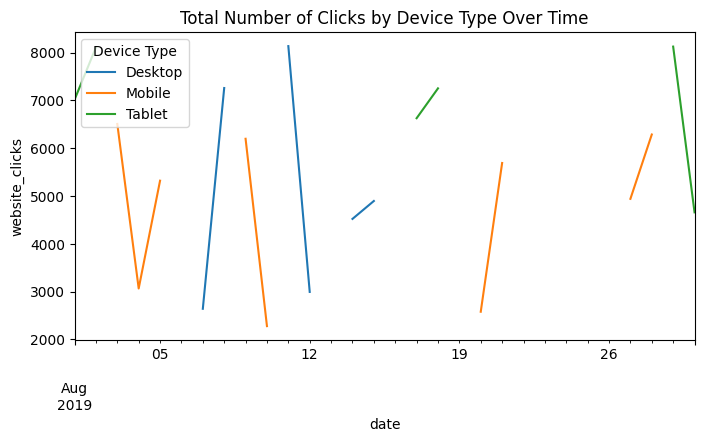

In [17]:

# Group the data by 'Date' and 'Device Type', and calculate total number of clicks for each group
clicks_by_device = abtest.groupby(['date', 'Device Type'])['website_clicks'].sum().unstack()

# Plot the time series for each device type
clicks_by_device.plot(figsize=(8, 4))

# Add labels and title
plt.title('Total Number of Clicks by Device Type Over Time')
plt.xlabel('date')
plt.ylabel('website_clicks')

# Add legend
plt.legend(title='Device Type', loc='upper left')

# Show plot
plt.show()


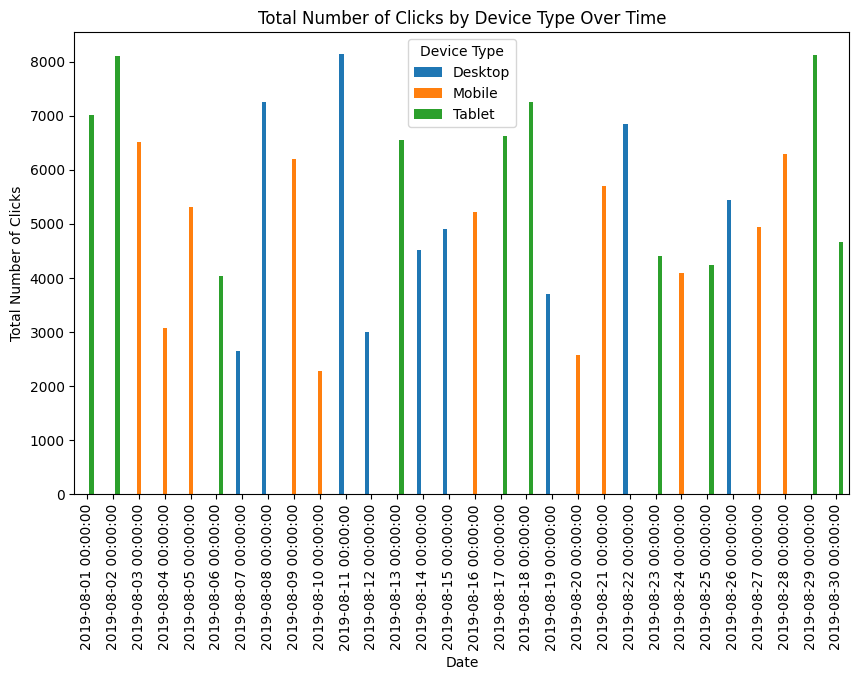

In [18]:

# Group the data by 'Date' and 'Device Type', and calculate total number of clicks for each group
clicks_by_device = abtest.groupby(['date', 'Device Type'])['website_clicks'].sum().unstack()

# Plot the bar graph for each device type
clicks_by_device.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Total Number of Clicks by Device Type Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Clicks')

# Add legend
plt.legend(title='Device Type')

# Show plot
plt.show()


In [19]:
import scipy.stats as stats

# Given parameters
MDE = 0.03  # 3% minimum detectable effect
alpha = 0.05  # 95% confidence level
power = 0.80  # 80% power
sigma = 1  # estimated standard deviation of the metric

# Z-scores for the given alpha and power
Z_alpha = stats.norm.ppf(1 - alpha/2)
Z_beta = stats.norm.ppf(power)

# Calculate sample size
n = ((2 * (Z_alpha + Z_beta) * sigma) / MDE)**2

print("Required sample size per group:", round(n))


Required sample size per group: 34884


#  our current sample size is lesser than this value, we can conclude that we have not sufficient sample size to conduct the test. message indicating that more data is needed to achieve the desired level of confidence and power.








In [20]:
import scipy.stats as stats

def perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level=95):
    # Calculate conversion rates
    control_conversion_rate = control_conversions / control_visitors
    treatment_conversion_rate = treatment_conversions / treatment_visitors
    
    # Calculate pooled probability and pooled standard error
    pooled_probability = (control_conversions + treatment_conversions) / (control_visitors + treatment_visitors)
    pooled_se = (pooled_probability * (1 - pooled_probability) * (1/control_visitors + 1/treatment_visitors)) ** 0.5
    
    # Calculate z-score
    z_score = (treatment_conversion_rate - control_conversion_rate) / pooled_se
    
    # Determine critical z-value based on confidence level
    if confidence_level == 90:
        critical_z = 1.645  # 90% confidence level
    elif confidence_level == 95:
        critical_z = 1.96  # 95% confidence level
    elif confidence_level == 99:
        critical_z = 2.576  # 99% confidence level
    else:
        raise ValueError("Invalid confidence level. Please choose from 90, 95, or 99.")
    
    # Compare z-score to critical z-value and return result
    if z_score > critical_z:
        return "Experiment Group is Better"
    elif z_score < -critical_z:
        return "Control Group is Better"
    else:
        return "Indeterminate"

# let's take the example according to the comparable size of abtest dataset:
control_visitors = 28
control_conversions = 8
treatment_visitors = 30
treatment_conversions = 18
confidence_level = 95

result = perform_ab_test(control_visitors, control_conversions, treatment_visitors, treatment_conversions, confidence_level)
print("Result of A/B test:", result)


Result of A/B test: Experiment Group is Better
